In [188]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import csv
import os
from statsmodels.graphics.mosaicplot import mosaic
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
from matplotlib.ticker import FuncFormatter

In [184]:
train_data = pd.read_csv("titanic/train.csv")
test_data = pd.read_csv("titanic/test.csv")
train_data["Title"] = train_data['Name'].str.extract(r",\s*([^\.]+)\.") 
test_data["Title"] = test_data['Name'].str.extract(r",\s*([^\.]+)\.") 
train_data['Surname'] = train_data['Name'].apply(lambda x: x.split(',')[0] if ',' in x else x.split('.')[0])
test_data['Surname'] = test_data['Name'].apply(lambda x: x.split(',')[0] if ',' in x else x.split('.')[0])

family_sizes = train_data.groupby('Surname').size()
train_data['Family_size'] = train_data['Surname'].map(family_sizes)

family_sizes = test_data.groupby('Surname').size()
test_data['Family_size'] = test_data['Surname'].map(family_sizes)

In [167]:
women = train_data.loc[train_data.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)

print("% of women who survived:", rate_women)

men = train_data.loc[train_data.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)

print("% of men who survived:", rate_men)

% of women who survived: 0.7420382165605095
% of men who survived: 0.18890814558058924


In [168]:
y = train_data["Survived"]

features = ["Pclass", "Sex", "SibSp", "Parch"]
X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [169]:
# Extract title from passenger names
train_data["Title"] = train_data['Name'].str.extract(r",\s*([^\.]+)\.") 

# Show title counts by sex
title_counts = pd.crosstab(train_data['Sex'], train_data['Title'])
print(title_counts)

Title   Capt  Col  Don  Dr  Jonkheer  Lady  Major  Master  Miss  Mlle  Mme  \
Sex                                                                          
female     0    0    0   1         0     1      0       0   182     2    1   
male       1    2    1   6         1     0      2      40     0     0    0   

Title    Mr  Mrs  Ms  Rev  Sir  the Countess  
Sex                                           
female    0  125   1    0    0             1  
male    517    0   0    6    1             0  


In [170]:
# Reassign specific titles
train_data["Title"] = train_data["Title"].replace({
    "Mlle": "Miss",
    "Ms": "Miss",
    "Mme": "Mrs"
})
# List of rare titles to group into "Rare Title"
rare_titles = ['Dona', 'Lady', 'the Countess', 'Capt', 'Col', 'Don',
               'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer']
# Assign rare titles to "Rare Title"
train_data["Title"] = train_data["Title"].apply(lambda x: "Rare Title" if x in rare_titles else x)


In [40]:
train_data[["Title", "Name"]]

,Title,Name
0,Mr. Owen Harris,"Braund, Mr. Owen Harris"
1,Mrs. John Bradley (Florence Briggs Thayer),"Cumings, Mrs. John Bradley (Florence Briggs Th..."
2,Miss. Laina,"Heikkinen, Miss. Laina"
3,Mrs. Jacques Heath (Lily May Peel),"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
4,Mr. William Henry,"Allen, Mr. William Henry"
...,...,...
886,Rev. Juozas,"Montvila, Rev. Juozas"
887,Miss. Margaret Edith,"Graham, Miss. Margaret Edith"
888,"Miss. Catherine Helen ""Carrie""","Johnston, Miss. Catherine Helen ""Carrie"""
889,Mr. Karl Howell,"Behr, Mr. Karl Howell"


In [44]:

# Extract surname
train_data['Surname'] = train_data['Name'].apply(lambda x: x.split(',')[0] if ',' in x else x.split('.')[0])
train_data['Surname']

0         Braund
1        Cumings
2      Heikkinen
3       Futrelle
4          Allen
         ...    
886     Montvila
887       Graham
888     Johnston
889         Behr
890       Dooley
Name: Surname, Length: 891, dtype: object

In [75]:

family_sizes = train_data.groupby('Surname').size()
train_data['Family_size'] = train_data['Surname'].map(family_sizes)
# Check the result
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Surname,Family_size
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,Braund,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,Cumings,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,Heikkinen,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,Futrelle,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,Allen,2


Now I want to make a distribution of the family sizes

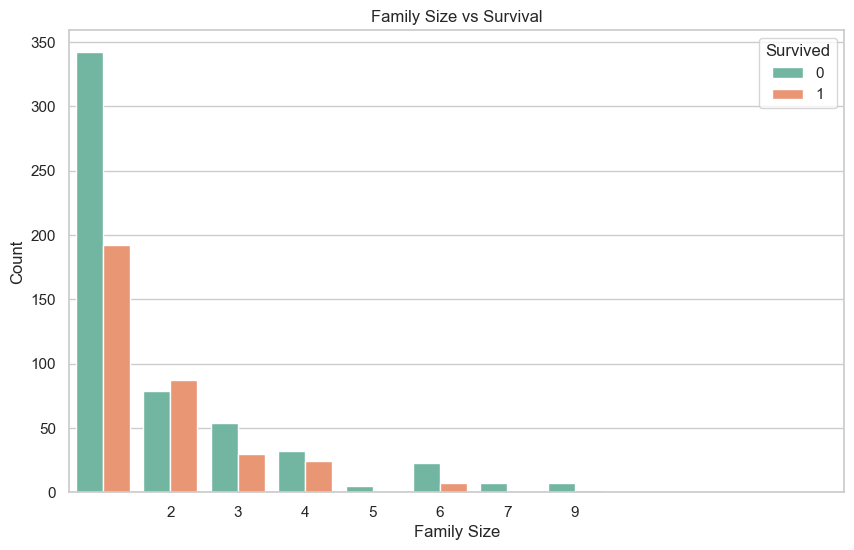

In [77]:

# Set the plot style to mimic ggplot2
sns.set(style="whitegrid")

# Create the count plot with 'dodge' to separate survival status
plt.figure(figsize=(10, 6))
sns.countplot(data=train_data, x='Family_size', hue='Survived', dodge=True, palette='Set2')

# Customize the plot
plt.title('Family Size vs Survival')
plt.xlabel('Family Size')
plt.ylabel('Count')
plt.xticks(range(1, 12))  # Specify the x-axis ticks to match family sizes 1-11
plt.show()

In [79]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Surname,Family_size,Family_size_category
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,Braund,2,small
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,Cumings,1,singleton
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,Heikkinen,1,singleton
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,Futrelle,2,small
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,Allen,2,small


quite clear that the bigger your family the most probable to survive.


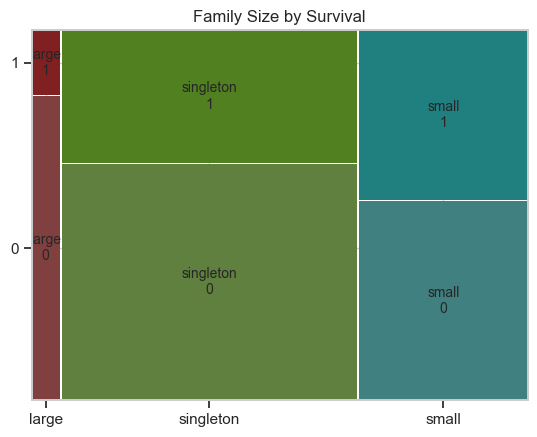

In [78]:


# Discretize family size into categories
train_data['Family_size_category'] = np.where(train_data['Family_size'] == 1, 'singleton', 
                          np.where((train_data['Family_size'] > 1) & (train_data['Family_size'] < 5), 'small', 'large'))

# Create a contingency table for family size by survival
contingency_table = pd.crosstab(train_data['Family_size_category'], train_data['Survived'])

# Show the mosaic plot
mosaic(contingency_table.stack(), title='Family Size by Survival')
plt.show()

Looks like you re kinda in a bad spot if you re a singleton or bunch of blokes. You are better of sticking with just a couple of chads

In [133]:

train_data.groupby[("Age").size()]

AttributeError: 'str' object has no attribute 'size'

In [112]:
type(train_data_no_cabin)

pandas.core.frame.DataFrame

Now lets check for null values

In [134]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [161]:
train_data_no_age_no_cabin.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500,S


In [157]:
train_data = pd.read_csv("titanic/train.csv")
train_data_no_age = train_data.drop('Age', axis=1)
train_data_no_age_no_cabin = train_data_no_age.drop('Cabin', axis=1)

In [177]:
missing_rows = train_data_no_age_no_cabin[train_data_no_age_no_cabin.isnull().any(axis=1)]
print(missing_rows.PassengerId)
missing_embarkment_PassengerId = missing_rows.PassengerId

61      62
829    830
Name: PassengerId, dtype: int64


looks like passengers 61 and 829 (both women) dont mention where they embarked. I ll check if they had families to see where they embarked

In [185]:
missing_rows = train_data[train_data['PassengerId'].isin(missing_embarkment_PassengerId)]

In [186]:
print(missing_rows)

     PassengerId  Survived  Pclass                                       Name  \
61            62         1       1                        Icard, Miss. Amelie   
829          830         1       1  Stone, Mrs. George Nelson (Martha Evelyn)   

        Sex   Age  SibSp  Parch  Ticket  Fare Cabin Embarked Title Surname  \
61   female  38.0      0      0  113572  80.0   B28      NaN  Miss   Icard   
829  female  62.0      0      0  113572  80.0   B28      NaN   Mrs   Stone   

     Family_size  
61             1  
829            1  


Bad Luck, the had no family. so lets try  

In [183]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Surname,Family_size
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,Braund,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,Cumings,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,Heikkinen,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,Futrelle,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,Allen,2


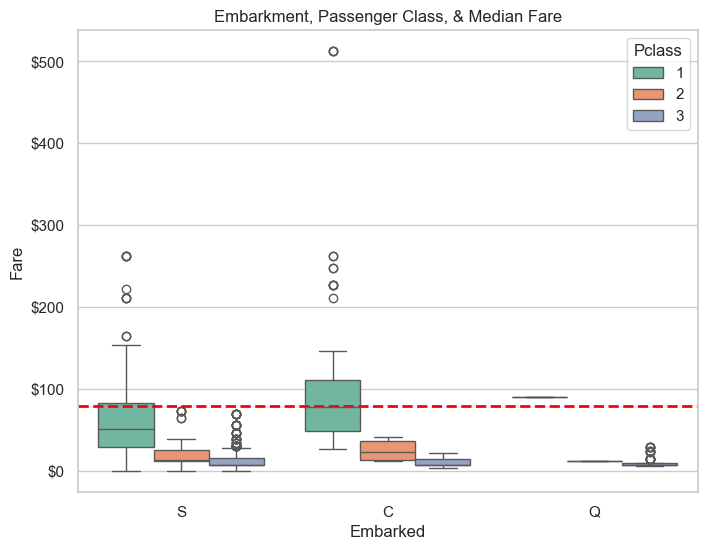

In [189]:
# Filter data to exclude PassengerId 62 and 830
embark_fare = train_data[~train_data['PassengerId'].isin([62, 830])]

# Set up the plot
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")

# Create the boxplot
sns.boxplot(x='Embarked', y='Fare', hue='Pclass', data=embark_fare, palette="Set2")

# Add a horizontal dashed line at y=80
plt.axhline(y=80, color='red', linestyle='--', linewidth=2)

# Format the y-axis to display currency
formatter = FuncFormatter(lambda x, pos: '${:,.0f}'.format(x))
plt.gca().yaxis.set_major_formatter(formatter)

# Set labels and title
plt.title('Embarkment, Passenger Class, & Median Fare')
plt.xlabel('Embarked')
plt.ylabel('Fare')

# Show the plot
plt.show()

The median fare for a first class passenger departing from Charbourg (‘C’) coincides nicely with the $80 paid by our embarkment-deficient passengers. I think we can safely replace the NA values with ‘C’.

In [190]:
train_data['Embarked'] = train_data['Embarked'].fillna('C')

In [191]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Title            0
Surname          0
Family_size      0
dtype: int64

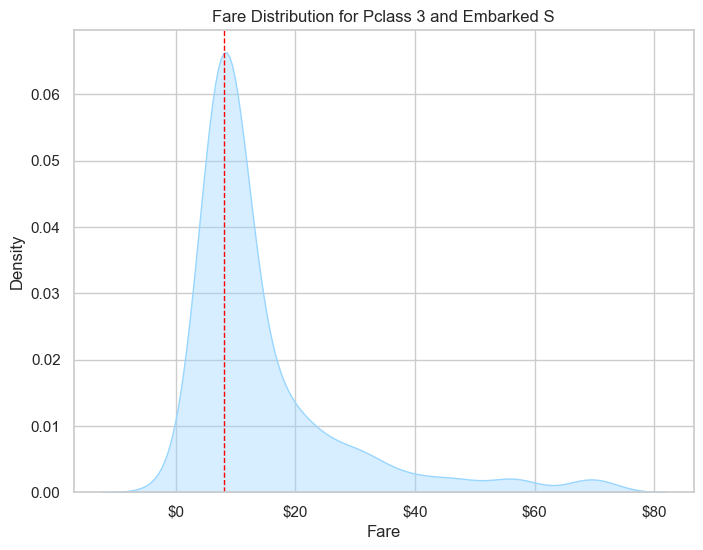

In [192]:
# Filter the data for Pclass == 3 and Embarked == 'S'
filtered_data = train_data[(train_data['Pclass'] == 3) & (train_data['Embarked'] == 'S')]

# Set up the plot
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")

# Create the density plot
sns.kdeplot(filtered_data['Fare'], fill=True, color='#99d6ff', alpha=0.4)

# Add a vertical dashed line at the median of Fare
median_fare = filtered_data['Fare'].median()
plt.axvline(x=median_fare, color='red', linestyle='--', linewidth=1)

# Format the x-axis to display currency
formatter = FuncFormatter(lambda x, pos: '${:,.0f}'.format(x))
plt.gca().xaxis.set_major_formatter(formatter)

# Set labels and title
plt.title('Fare Distribution for Pclass 3 and Embarked S')
plt.xlabel('Fare')
plt.ylabel('Density')

# Show the plot
plt.show()